# **Image Classification CIFAR10:CNN based experiments**

This notebook is divided into following code sections:

Section-1
*   Data Splitting Technique into Train-Val-Test
*   Visualizing the Data

---
Section-2
Base Model Creation and Tuning

---

Section-3

*   Model-1: ResNet18
*   Part-1 : Optimizer Selection
*   Part 2: Training and Tuning
---

Section-4
*   Model-2: AlexNet
*   Part-1 : Optimizer Selection
*   Part 2: Training and Tuning
---

Section-5
*   Model-3: MobileNetV2
*   Part-1 : Optimizer Selection
*   Part 2: Training and Tuning












## **Note:**
you might see the data loading and train val test split on many code sections, this is particularly because , this project took many days and to avoid switching and searching for the code cell again and again , I have implemented data loading and splitting on different cells as well.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10
from torchvision.models import resnet18, alexnet, mobilenet_v2
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

I am using pytorch version to download the data CIFAR10 which comes in Train and Test part, I will then divide the Train data to 85%-15% split as Train and Validation. Will take Validation for model training and will check the final performance separately on Test data

In [3]:
# Defining transformations for the training set to rescale it, normalize it and data augumentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Defining transformations for the training set to rescale and normalize it
val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [4]:
# Load CIFAR-10 dataset (with no transformations at this stage)
full_dataset = CIFAR10(root='./data', train=True, download=True)

100%|██████████| 170M/170M [00:02<00:00, 82.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
# Spliting the dataset(train part) into training and validation sets (85% train, 15% val)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])


In [6]:
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=val_test_transform)

Files already downloaded and verified


I will be applying one transformation on Train and other on Validation and Test , so that the Augumetation part is onTraining Data only and not on Test/Validation Data, to prevent Data leakage.

In [7]:
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# **Visualization**

Displaying training image...


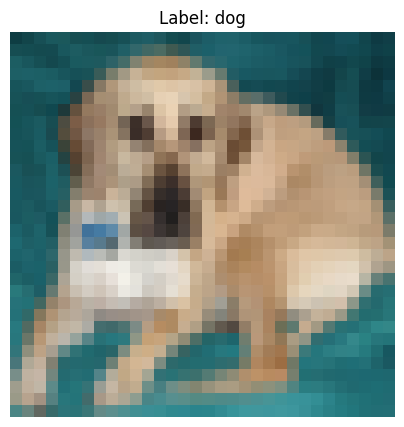

In [9]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(image, label):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'Label: {class_names[label]}')
    plt.axis('off')
    plt.show()

print("Displaying training image...")

train_batch = next(iter(train_loader))
train_images, train_labels = train_batch

image_to_show = train_images[0].permute(1, 2, 0).numpy()
image_to_show = (image_to_show * 0.5 + 0.5).clip(0, 1)

show_image(image_to_show, train_labels[0].item())


1.Count Plot for Each Class

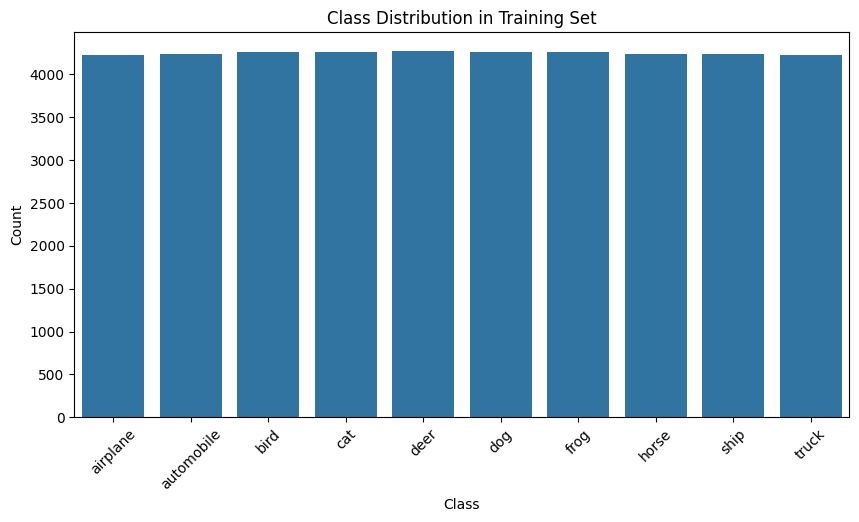

In [12]:
train_labels_list = []
for _, labels in train_loader:
    train_labels_list.extend(labels.numpy())

train_class_counts = np.bincount(train_labels_list)

plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=train_class_counts)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

2. Pie Chart for class distribution percentage


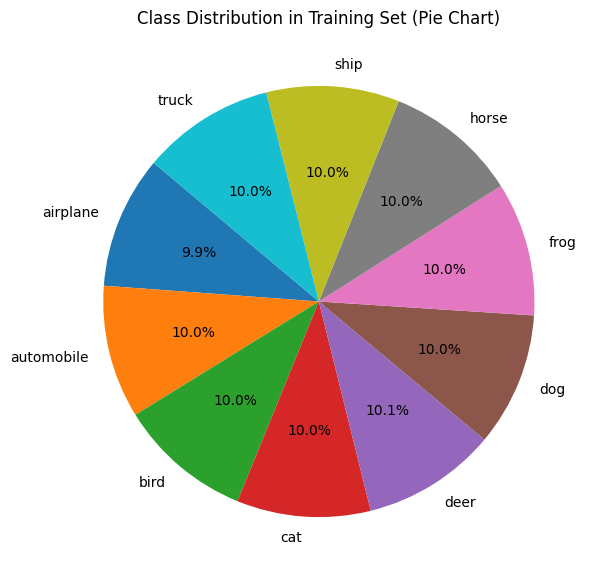

In [13]:
plt.figure(figsize=(7, 7))
plt.pie(train_class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution in Training Set (Pie Chart)")
plt.show()


# **Base Model**

In [2]:

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

full_dataset = CIFAR10(root='./data', train=True, download=True)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

test_dataset = CIFAR10(root='./data', train=False, download=True, transform=val_test_transform)
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:01<00:00, 95.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Training with Adam optimizer...
Epoch 1/10 - Train Loss: 1.3131 - Train Acc: 52.96% - Val Loss: 0.9647 - Val Acc: 65.43%
Epoch 2/10 - Train Loss: 0.8719 - Train Acc: 69.51% - Val Loss: 0.7240 - Val Acc: 74.45%
Epoch 3/10 - Train Loss: 0.7022 - Train Acc: 76.08% - Val Loss: 0.6273 - Val Acc: 78.39%
Epoch 4/10 - Train Loss: 0.5768 - Train Acc: 80.42% - Val Loss: 0.5602 - Val Acc: 80.65%
Epoch 5/10 - Train Loss: 0.4844 - Train Acc: 83.31% - Val Loss: 0.5583 - Val Acc: 81.31%
Epoch 6/10 - Train Loss: 0.4029 - Train Acc: 86.39% - Val Loss: 0.5760 - Val Acc: 80.89%
Epoch 7/10 - Train Loss: 0.3349 - Train Acc: 88.45% - Val Loss: 0.5598 - Val Acc: 82.39%
Epoch 8/10 - Train Loss: 0.2722 - Train Acc: 90.60% - Val Loss: 0.5703 - Val Acc: 81.75%
Epoch 9/10 - Train Loss: 0.2353 - Train Acc: 91.91% - Val Loss: 0.5937 - Val Acc: 82.12%
Epoch 10/10 - Train Loss: 0.1922 - Train Acc: 93.51% - Val Loss: 0.6501 - Val Acc: 81.49%

Training with SGD optimizer...
Epoch 1/10 - Train Loss: 1.3431 - Train Acc: 

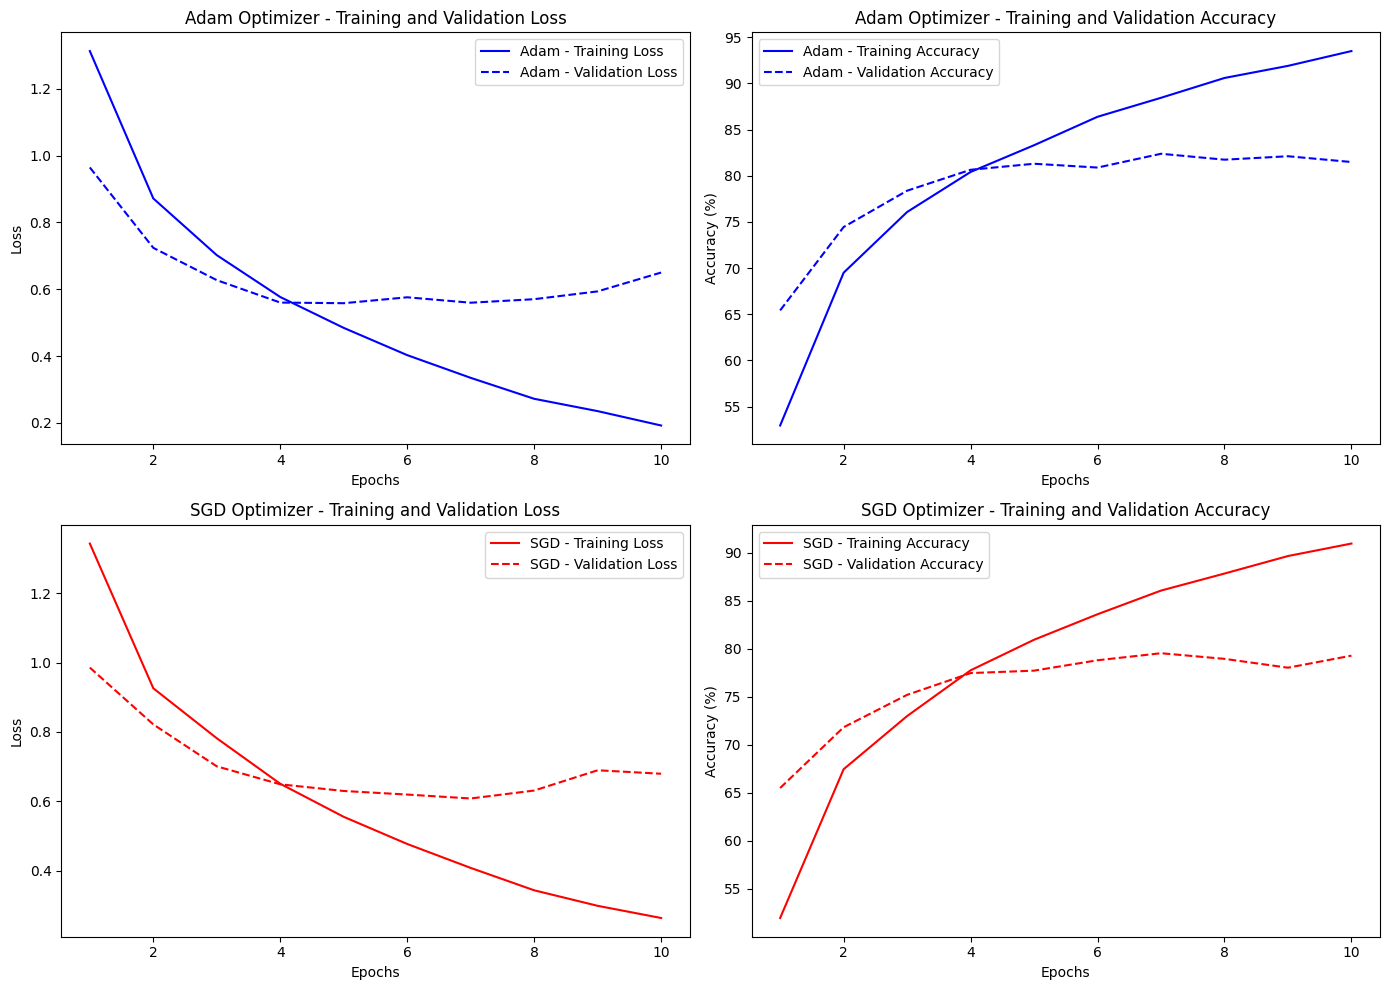

In [6]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2),

            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.4),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)


        # Training function
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    return train_loss / len(train_loader), 100. * correct / total

# Evaluation function
def evaluate(model, val_loader, criterion):
    model.eval()
    val_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return val_loss / len(val_loader), 100. * correct / total

# Hyperparameters
num_epochs = 10
criterion = nn.CrossEntropyLoss()

train_loss_adam, train_acc_adam, val_loss_adam, val_acc_adam = [], [], [], []
train_loss_sgd, train_acc_sgd, val_loss_sgd, val_acc_sgd = [], [], [], []

# Training with Adam optimizer
model_adam = CNNModel(num_classes=10)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

print("Training with Adam optimizer...")
for epoch in range(num_epochs):
    train_loss, train_acc = train(model_adam, train_loader, optimizer_adam, criterion)
    val_loss, val_acc = evaluate(model_adam, val_loader, criterion)
    train_loss_adam.append(train_loss)
    train_acc_adam.append(train_acc)
    val_loss_adam.append(val_loss)
    val_acc_adam.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%")

# Training with SGD optimizer
model_sgd = CNNModel(num_classes=10)
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.001, momentum=0.9)

print("\nTraining with SGD optimizer...")
for epoch in range(num_epochs):
    train_loss, train_acc = train(model_sgd, train_loader, optimizer_sgd, criterion)
    val_loss, val_acc = evaluate(model_sgd, val_loader, criterion)
    train_loss_sgd.append(train_loss)
    train_acc_sgd.append(train_acc)
    val_loss_sgd.append(val_loss)
    val_acc_sgd.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%")

# Plotting the results
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 10))

# Plot Adam optimizer - Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss_adam, 'b-', label='Adam - Training Loss')
plt.plot(epochs, val_loss_adam, 'b--', label='Adam - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Adam Optimizer - Training and Validation Loss')

# Plot Adam optimizer - Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, train_acc_adam, 'b-', label='Adam - Training Accuracy')
plt.plot(epochs, val_acc_adam, 'b--', label='Adam - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Adam Optimizer - Training and Validation Accuracy')

# Plot SGD optimizer - Loss
plt.subplot(2, 2, 3)
plt.plot(epochs, train_loss_sgd, 'r-', label='SGD - Training Loss')
plt.plot(epochs, val_loss_sgd, 'r--', label='SGD - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('SGD Optimizer - Training and Validation Loss')

# Plot SGD optimizer - Accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, train_acc_sgd, 'r-', label='SGD - Training Accuracy')
plt.plot(epochs, val_acc_sgd, 'r--', label='SGD - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('SGD Optimizer - Training and Validation Accuracy')

plt.tight_layout()
plt.show()


Both Optimizers are overfitting, but I am proceeding with Adam here, coz both the training and validation accuracy is better, and both training and validation loss is less in Adam than in SDG.

Now to reduce the overfitting in Adam I am adding dropout of 0.4 to second last layer , and increasing the last dropout to 0.5

Training with Adam optimizer...
Epoch 1/10 - Train Loss: 1.3116 - Train Acc: 53.38% - Val Loss: 0.8926 - Val Acc: 68.56%
Epoch 2/10 - Train Loss: 0.9099 - Train Acc: 68.31% - Val Loss: 0.7200 - Val Acc: 75.20%
Epoch 3/10 - Train Loss: 0.7629 - Train Acc: 74.10% - Val Loss: 0.6599 - Val Acc: 76.69%
Epoch 4/10 - Train Loss: 0.6621 - Train Acc: 77.66% - Val Loss: 0.5705 - Val Acc: 80.37%
Epoch 5/10 - Train Loss: 0.5849 - Train Acc: 80.16% - Val Loss: 0.5334 - Val Acc: 81.39%
Epoch 6/10 - Train Loss: 0.5252 - Train Acc: 82.20% - Val Loss: 0.5371 - Val Acc: 81.67%
Epoch 7/10 - Train Loss: 0.4773 - Train Acc: 83.72% - Val Loss: 0.5193 - Val Acc: 82.01%
Epoch 8/10 - Train Loss: 0.4287 - Train Acc: 85.49% - Val Loss: 0.5131 - Val Acc: 82.97%
Epoch 9/10 - Train Loss: 0.3941 - Train Acc: 86.67% - Val Loss: 0.5027 - Val Acc: 82.97%
Epoch 10/10 - Train Loss: 0.3634 - Train Acc: 87.72% - Val Loss: 0.5373 - Val Acc: 82.69%


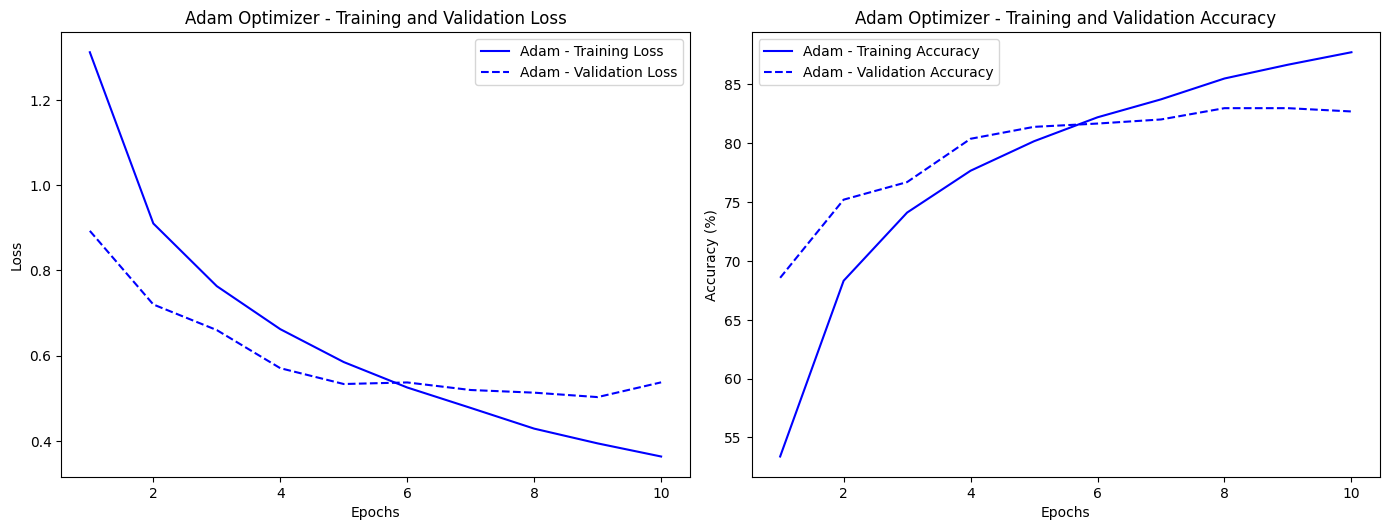

In [7]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2), nn.Dropout(0.5), #adding dropout of 0.5

            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.5), # dropout increased here
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.model(x)

    # Training function
def train(model, train_loader, optimizer, criterion):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    return train_loss / len(train_loader), 100. * correct / total

# Evaluation function
def evaluate(model, val_loader, criterion):
    model.eval()
    val_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    return val_loss / len(val_loader), 100. * correct / total

# Hyperparameters
num_epochs = 10
criterion = nn.CrossEntropyLoss()

# Lists to store metrics for plotting
train_loss_adam, train_acc_adam, val_loss_adam, val_acc_adam = [], [], [], []

# Training with Adam optimizer
model_adam = CNNModel(num_classes=10)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

print("Training with Adam optimizer...")
for epoch in range(num_epochs):
    train_loss, train_acc = train(model_adam, train_loader, optimizer_adam, criterion)
    val_loss, val_acc = evaluate(model_adam, val_loader, criterion)
    train_loss_adam.append(train_loss)
    train_acc_adam.append(train_acc)
    val_loss_adam.append(val_loss)
    val_acc_adam.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.2f}% - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%")

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss_adam, 'b-', label='Adam - Training Loss')
plt.plot(epochs, val_loss_adam, 'b--', label='Adam - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Adam Optimizer - Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(epochs, train_acc_adam, 'b-', label='Adam - Training Accuracy')
plt.plot(epochs, val_acc_adam, 'b--', label='Adam - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Adam Optimizer - Training and Validation Accuracy')

plt.tight_layout()
plt.show()



Finalizing on this Model coz both Training and Validation accuray are decent and , losses are pretty low too.

---
Evaluationg the performance using the test set, where Test Accuracy: 82.04%


Test Accuracy: 82.40%
              precision    recall  f1-score   support

    airplane       0.80      0.84      0.82      1000
  automobile       0.91      0.93      0.92      1000
        bird       0.78      0.70      0.73      1000
         cat       0.66      0.74      0.70      1000
        deer       0.77      0.86      0.81      1000
         dog       0.84      0.67      0.75      1000
        frog       0.84      0.88      0.86      1000
       horse       0.91      0.83      0.87      1000
        ship       0.84      0.93      0.88      1000
       truck       0.92      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



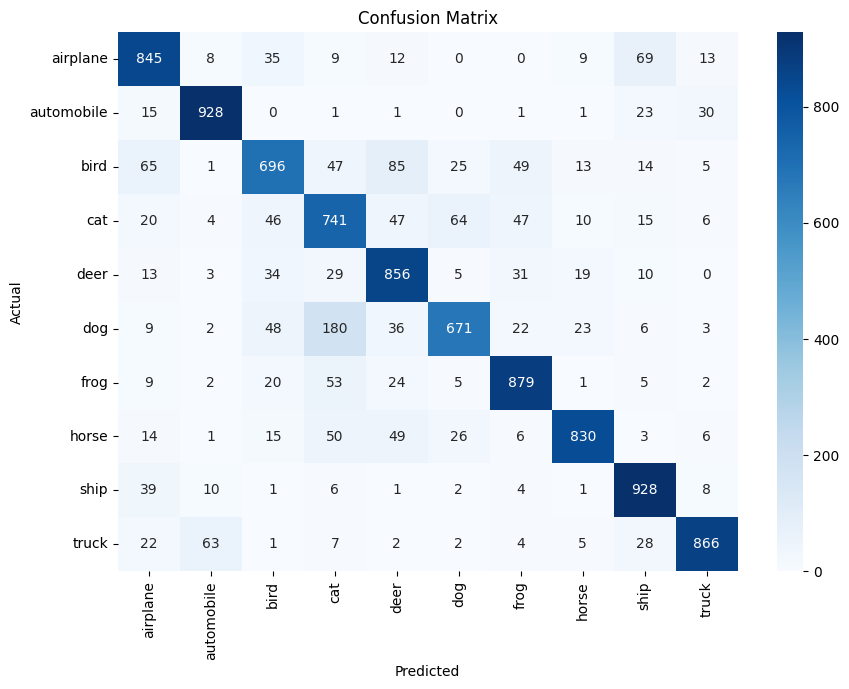

In [12]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    return all_labels, all_preds

model_adam.to(device)

test_labels, test_preds = evaluate_model(model_adam, test_loader)

test_accuracy = (np.array(test_preds) == np.array(test_labels)).mean()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, test_preds)
class_report = classification_report(test_labels, test_preds, target_names=test_loader.dataset.classes)

print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_loader.dataset.classes,
            yticklabels=test_loader.dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# **Model 1 - ResNet18**

Using the ResNet18 Model without pre trained weights so as to train it from scratch.



### **Part:1 Optimizers**

1. Adam

In [ ]:
model = resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)


    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'{len(train_loader)}/{len(train_loader)} ━━━━━━━━━━━━━━━━━━━━ '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')


Epoch 1/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.4854 - loss: 1.4504 - val_accuracy: 0.5885 - val_loss: 1.1760
Epoch 2/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.6331 - loss: 1.0518 - val_accuracy: 0.6633 - val_loss: 0.9755
Epoch 3/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.6960 - loss: 0.8754 - val_accuracy: 0.7085 - val_loss: 0.8520
Epoch 4/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7429 - loss: 0.7441 - val_accuracy: 0.7296 - val_loss: 0.8108
Epoch 5/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7792 - loss: 0.6358 - val_accuracy: 0.7583 - val_loss: 0.7255
Epoch 6/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8138 - loss: 0.5367 - val_accuracy: 0.7553 - val_loss: 0.7578
Epoch 7/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8480 - loss: 0.4391 - val_accuracy: 0.7479 - val_loss: 0.7874
Epoch 8/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8762 - loss: 0.3585 - val_accuracy: 0.7672 - val_loss: 0.7563
Epoch 9/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.

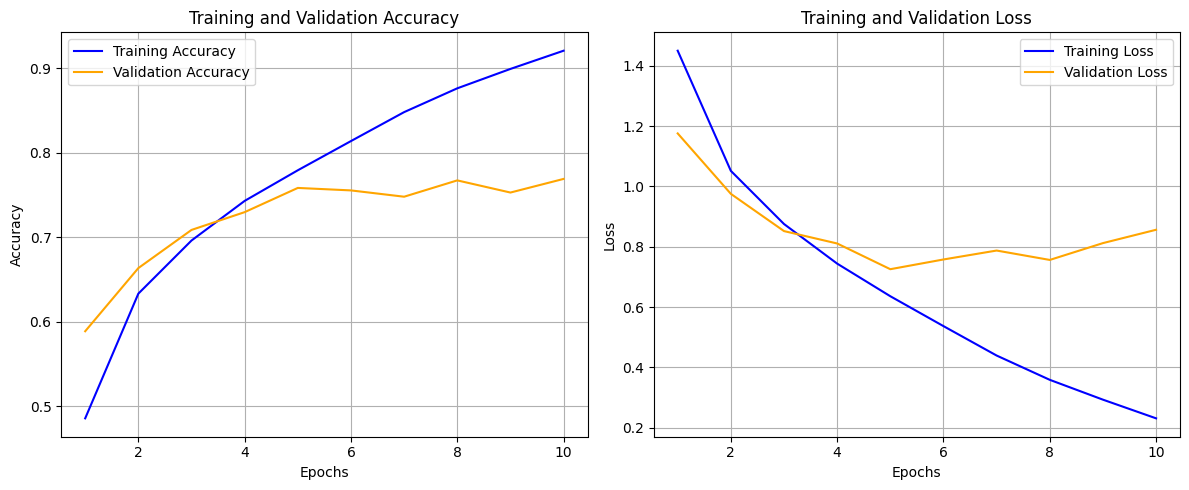

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


2.SDG

In [ ]:
model1 = resnet18(weights=None)
model1.fc = nn.Linear(model1.fc.in_features, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)


In [ ]:
num_epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)


    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)


    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'{len(train_loader)}/{len(train_loader)} ━━━━━━━━━━━━━━━━━━━━ '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

Epoch 1/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.4260 - loss: 1.6852 - val_accuracy: 0.5471 - val_loss: 1.2795
Epoch 2/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.5864 - loss: 1.1875 - val_accuracy: 0.6323 - val_loss: 1.0563
Epoch 3/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.6651 - loss: 0.9733 - val_accuracy: 0.6716 - val_loss: 0.9442
Epoch 4/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7101 - loss: 0.8382 - val_accuracy: 0.6928 - val_loss: 0.9029
Epoch 5/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7572 - loss: 0.7006 - val_accuracy: 0.7075 - val_loss: 0.8584
Epoch 6/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7877 - loss: 0.6125 - val_accuracy: 0.6009 - val_loss: 2.2507
Epoch 7/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7180 - loss: 0.8107 - val_accuracy: 0.7067 - val_loss: 0.8873
Epoch 8/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8138 - loss: 0.5399 - val_accuracy: 0.7351 - val_loss: 0.7968
Epoch 9/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.

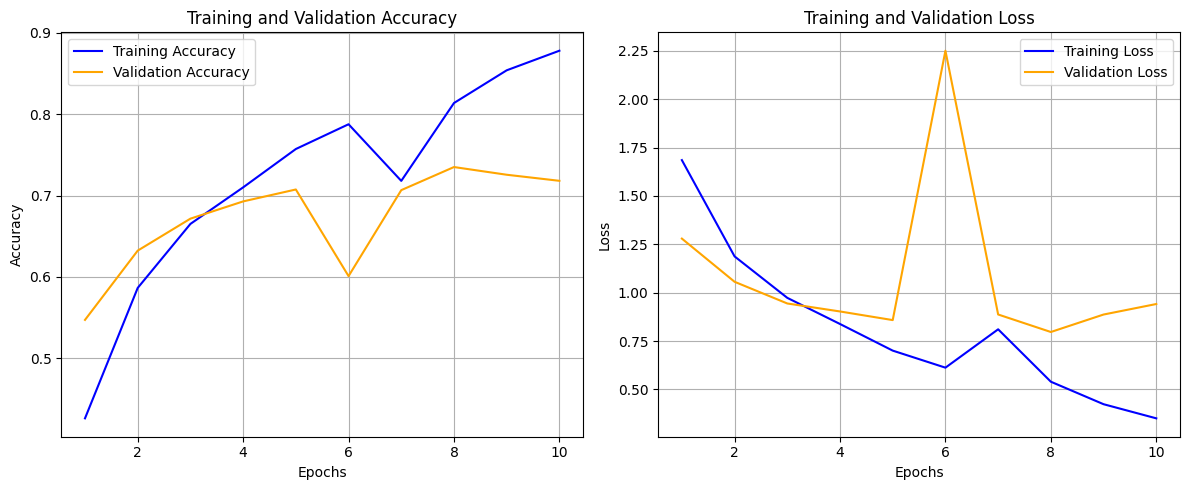

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


3. RMSProp

In [ ]:
model_rmsprop = resnet18(weights=None)
model_rmsprop.fc = nn.Linear(model_rmsprop.fc.in_features, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model_rmsprop.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model_rmsprop.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model_rmsprop(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model_rmsprop.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model_rmsprop(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)


    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'{len(train_loader)}/{len(train_loader)} ━━━━━━━━━━━━━━━━━━━━ '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

Epoch 1/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.4518 - loss: 1.5317 - val_accuracy: 0.3785 - val_loss: 2.2438
Epoch 2/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.6226 - loss: 1.0707 - val_accuracy: 0.6149 - val_loss: 1.1394
Epoch 3/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.6904 - loss: 0.8839 - val_accuracy: 0.5540 - val_loss: 1.5245
Epoch 4/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7431 - loss: 0.7398 - val_accuracy: 0.6083 - val_loss: 1.3916
Epoch 5/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.7820 - loss: 0.6277 - val_accuracy: 0.6905 - val_loss: 0.9648
Epoch 6/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8173 - loss: 0.5291 - val_accuracy: 0.6460 - val_loss: 1.2227
Epoch 7/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8482 - loss: 0.4383 - val_accuracy: 0.7117 - val_loss: 0.9121
Epoch 8/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.8743 - loss: 0.3596 - val_accuracy: 0.7259 - val_loss: 0.9146
Epoch 9/10 - 1329/1329 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.

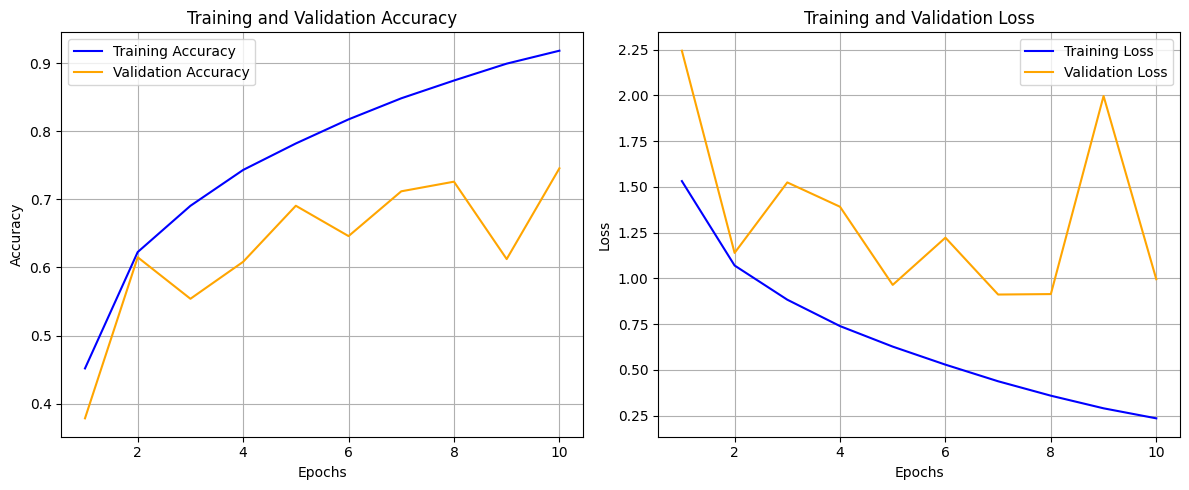

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## **Part-2 : Training and hyperparameter tuning**

I am continuing with SDG, it was already overfitting so experimented with : weight decay, to add L2 regularization, helping prevent overfitting by encouraging smaller weights.

Epoch 1/15 - accuracy: 0.4421 - loss: 1.5879 - val_accuracy: 0.5195 - val_loss: 1.4507
Epoch 2/15 - accuracy: 0.5878 - loss: 1.1775 - val_accuracy: 0.5473 - val_loss: 1.2853
Epoch 3/15 - accuracy: 0.6572 - loss: 0.9834 - val_accuracy: 0.6437 - val_loss: 1.0455
Epoch 4/15 - accuracy: 0.7175 - loss: 0.8135 - val_accuracy: 0.6677 - val_loss: 0.9776
Epoch 5/15 - accuracy: 0.7583 - loss: 0.6980 - val_accuracy: 0.7004 - val_loss: 0.8816
Epoch 6/15 - accuracy: 0.7946 - loss: 0.5887 - val_accuracy: 0.6948 - val_loss: 0.9315
Epoch 7/15 - accuracy: 0.8298 - loss: 0.4868 - val_accuracy: 0.6635 - val_loss: 1.1252
Epoch 8/15 - accuracy: 0.8256 - loss: 0.5030 - val_accuracy: 0.7017 - val_loss: 0.9918
Epoch 9/15 - accuracy: 0.8639 - loss: 0.3900 - val_accuracy: 0.7172 - val_loss: 0.9599
Epoch 10/15 - accuracy: 0.8945 - loss: 0.3040 - val_accuracy: 0.7080 - val_loss: 1.0819
Epoch 11/15 - accuracy: 0.8864 - loss: 0.3289 - val_accuracy: 0.6971 - val_loss: 1.1745
Epoch 12/15 - accuracy: 0.8640 - loss: 0.

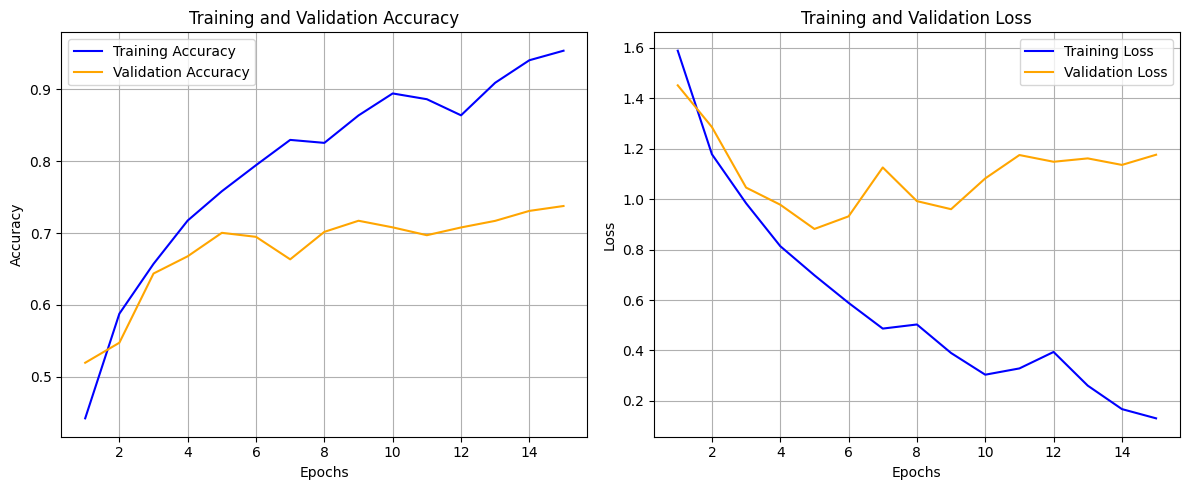

In [ ]:

model = resnet18(weights=None) # Initializing ResNet18 without pre-trained weights
model.fc = nn.Linear(model.fc.in_features, 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


The above approach was not helping much and model was overfitting too much,
to overcome this , I tried to experiment with


*   adding dropout

*  data augumentation,
*   learning rate scheduler


*   along with weigt decay





Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15 - accuracy: 0.4206 - loss: 1.7107 - val_accuracy: 0.4420 - val_loss: 1.6169
Epoch 2/15 - accuracy: 0.5138 - loss: 1.4360 - val_accuracy: 0.5171 - val_loss: 1.3974
Epoch 3/15 - accuracy: 0.6069 - loss: 1.1606 - val_accuracy: 0.6436 - val_loss: 1.0282
Epoch 4/15 - accuracy: 0.6745 - loss: 0.9504 - val_accuracy: 0.6436 - val_loss: 1.0688
Epoch 5/15 - accuracy: 0.6931 - loss: 0.8904 - val_accuracy: 0.6960 - val_loss: 0.8770
Epoch 6/15 - accuracy: 0.7441 - loss: 0.7348 - val_accuracy: 0.6657 - val_loss: 0.9720
Epoch 7/15 - accuracy: 0.7727 - loss: 0.6548 - val_accuracy: 0.6912 - val_loss: 0.9113
Epoch 8/15 - accuracy: 0.7641 - loss: 0.6745 - val_accuracy: 0.7093 - val_loss: 0.8533
Epoch 9/15 - accuracy: 0.8130 - loss: 0.5410 - val_accuracy: 0.7287 - val_loss: 0.8037
Epoch 10/15 - accuracy: 0.8403 - loss: 0.4640 - val_accuracy: 0.7280 - val_loss: 0.8302
Epoch 11/15 - accuracy: 0.8516 - loss: 0.4297 - val_a

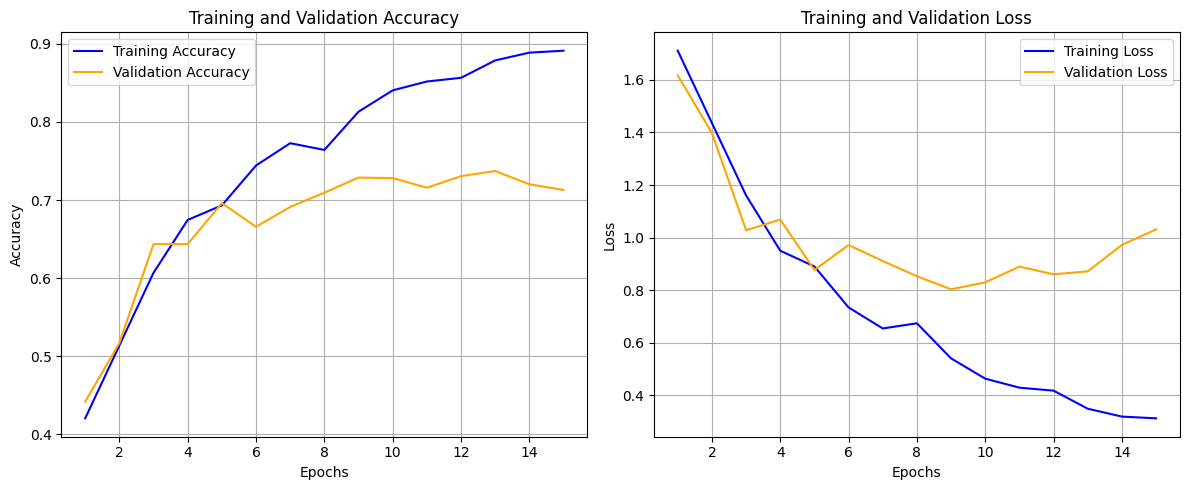

In [ ]:
# Data augmentation
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

val_test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

full_dataset = CIFAR10(root='./data', train=True, download=True)

train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

test_dataset = CIFAR10(root='./data', train=False, download=True,transform=val_test_transform)

train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model1 = resnet18(weights=None)
model1.fc = nn.Sequential(
    nn.Dropout(0.3),    #including 0.3 drpout layer
    nn.Linear(model1.fc.in_features, 10)
)

#SGD optimizer with weight decay
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Lists to store the metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 15
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


It went slighlty better but is still overfitting, so I

*  enhanced the data augumentaion,
*  increased dropout to 0.5,

*    then added label smoothening
*   used cosine annealing LR scheduler,

*   used weight deacy








Files already downloaded and verified
Files already downloaded and verified
Epoch 1/15 - accuracy: 0.2874 - loss: 2.2402 - val_accuracy: 0.2933 - val_loss: 2.5193
Epoch 2/15 - accuracy: 0.3699 - loss: 1.9951 - val_accuracy: 0.4091 - val_loss: 1.8128
Epoch 3/15 - accuracy: 0.4116 - loss: 1.8620 - val_accuracy: 0.2031 - val_loss: 3.4788
Epoch 4/15 - accuracy: 0.3563 - loss: 1.9285 - val_accuracy: 0.4275 - val_loss: 1.7491
Epoch 5/15 - accuracy: 0.4413 - loss: 1.7260 - val_accuracy: 0.4611 - val_loss: 1.6917
Epoch 6/15 - accuracy: 0.4840 - loss: 1.6330 - val_accuracy: 0.5177 - val_loss: 1.5596
Epoch 7/15 - accuracy: 0.5164 - loss: 1.5570 - val_accuracy: 0.4555 - val_loss: 1.7452
Epoch 8/15 - accuracy: 0.5275 - loss: 1.5411 - val_accuracy: 0.5504 - val_loss: 1.4791
Epoch 9/15 - accuracy: 0.5640 - loss: 1.4666 - val_accuracy: 0.5747 - val_loss: 1.4195
Epoch 10/15 - accuracy: 0.5888 - loss: 1.4143 - val_accuracy: 0.6003 - val_loss: 1.3875
Epoch 11/15 - accuracy: 0.6080 - loss: 1.3725 - val_a

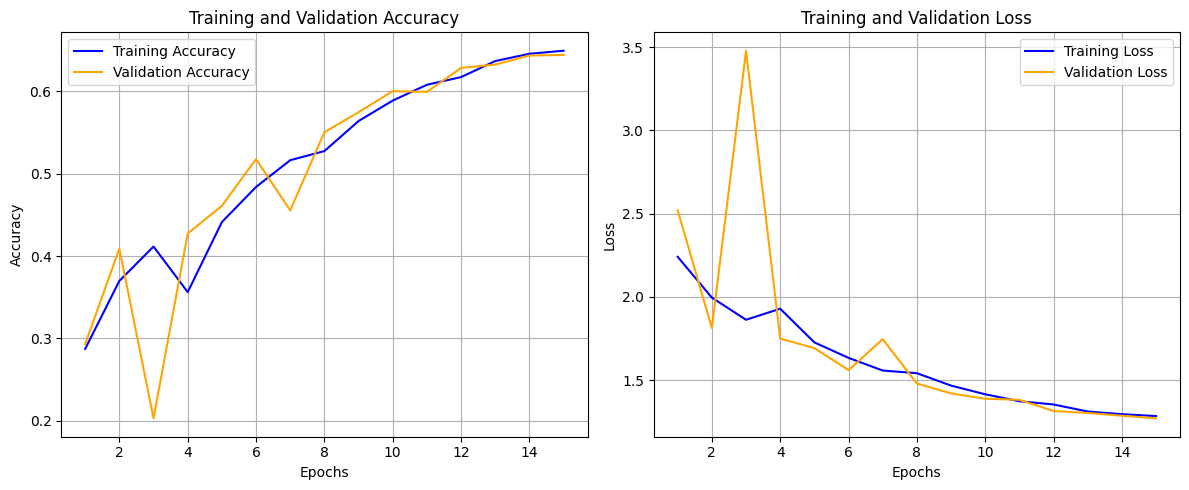

In [ ]:

# Enhanced Data Augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Added ColorJitter
    transforms.RandomRotation(15),  # Added RandomRotation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Loading Dataset
full_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model1 = resnet18(weights=None)
model1.fc = nn.Sequential(
    nn.Dropout(0.5),  # Increased Dropout Rate to 0.5
    nn.Linear(model1.fc.in_features, 10)
)


criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Added label smoothing
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15)  # Replaced StepLR

# Lists to store the metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 15
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')


    scheduler.step()

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



used same as above approach , but with increased epochs (enhanced data augumentaion, increased dropout to 0.5, then added label smoothening and used cosine annealing LR scheduler, and used weight deacy)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30 - accuracy: 0.2895 - loss: 2.2674 - val_accuracy: 0.3399 - val_loss: 2.2120
Epoch 2/30 - accuracy: 0.3559 - loss: 2.0294 - val_accuracy: 0.3804 - val_loss: 1.9507
Epoch 3/30 - accuracy: 0.4156 - loss: 1.8374 - val_accuracy: 0.4415 - val_loss: 1.8236
Epoch 4/30 - accuracy: 0.4645 - loss: 1.6925 - val_accuracy: 0.4619 - val_loss: 1.6823
Epoch 5/30 - accuracy: 0.4924 - loss: 1.6234 - val_accuracy: 0.5107 - val_loss: 1.5646
Epoch 6/30 - accuracy: 0.5218 - loss: 1.5568 - val_accuracy: 0.5152 - val_loss: 1.5429
Epoch 7/30 - accuracy: 0.5569 - loss: 1.4826 - val_accuracy: 0.5697 - val_loss: 1.4353
Epoch 8/30 - accuracy: 0.5866 - loss: 1.4174 - val_accuracy: 0.5985 - val_loss: 1.3835
Epoch 9/30 - accuracy: 0.6152 - loss: 1.3626 - val_accuracy: 0.6119 - val_loss: 1.3534
Epoch 10/30 - accuracy: 0.6290 - loss: 1.3231 - val_accuracy: 0.6319 - val_loss: 1.3250
Epoch 11/30 - accuracy: 0.6474 - loss: 1.2880 - val_a

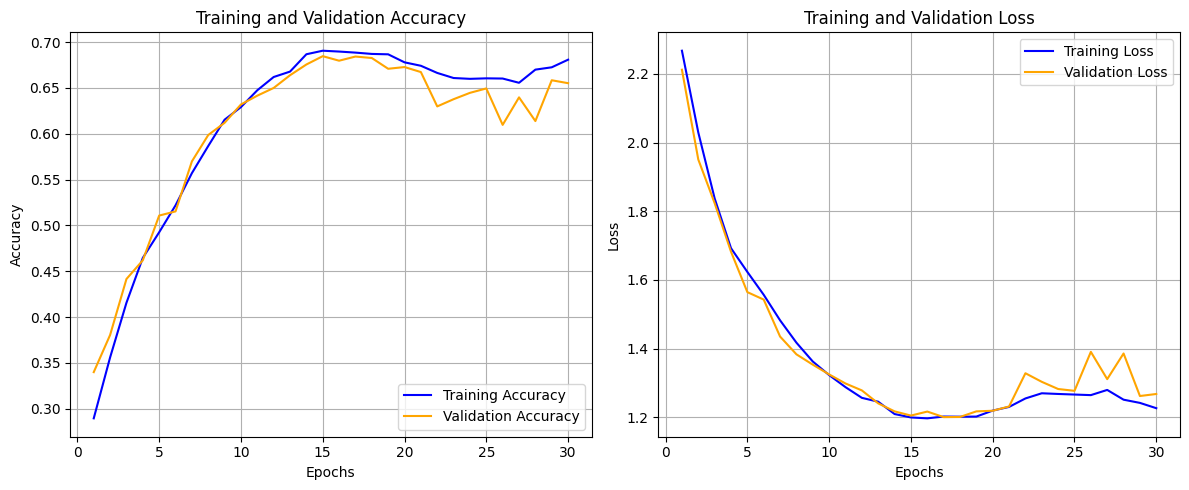

In [ ]:

model1 = resnet18(weights=None)
model1.fc = nn.Sequential(
    nn.Dropout(0.5),  # Increased Dropout Rate to 0.5
    nn.Linear(model1.fc.in_features, 10)
)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Added label smoothing
optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

# Cosine Annealing Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15)


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss = 0.0
    val_running_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')


    scheduler.step()

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



The overfitting issue kindof resolved but , accuracy was pretty low and validation was quite fluctuating so I

*   kept enhanced data augumentaion,
*   0.5 dropout,

*   added label smoothening
*   replaced cosine annealing LR scheduler to lambda lr scheduler

*   gradient clipping
*   weight deacy


100%|██████████| 170M/170M [00:02<00:00, 67.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/30 - accuracy: 0.1678 - loss: 2.4105 - val_accuracy: 0.2588 - val_loss: 2.0746
Epoch 2/30 - accuracy: 0.2527 - loss: 2.1335 - val_accuracy: 0.3225 - val_loss: 1.9349
Epoch 3/30 - accuracy: 0.3085 - loss: 1.9694 - val_accuracy: 0.3633 - val_loss: 1.8375
Epoch 4/30 - accuracy: 0.3564 - loss: 1.8695 - val_accuracy: 0.4024 - val_loss: 1.7701
Epoch 5/30 - accuracy: 0.3903 - loss: 1.8005 - val_accuracy: 0.4137 - val_loss: 1.7528
Epoch 6/30 - accuracy: 0.4179 - loss: 1.7523 - val_accuracy: 0.4521 - val_loss: 1.6741
Epoch 7/30 - accuracy: 0.4472 - loss: 1.6909 - val_accuracy: 0.4667 - val_loss: 1.6473
Epoch 8/30 - accuracy: 0.4638 - loss: 1.6566 - val_accuracy: 0.4677 - val_loss: 1.6536
Epoch 9/30 - accuracy: 0.4891 - loss: 1.6129 - val_accuracy: 0.5147 - val_loss: 1.5465
Epoch 10/30 - accuracy: 0.5042 - loss: 1.5777 - val_accuracy: 0.5240 - val_loss: 1.5308
Epoch 11/30 - accuracy: 0.5235 - loss: 1

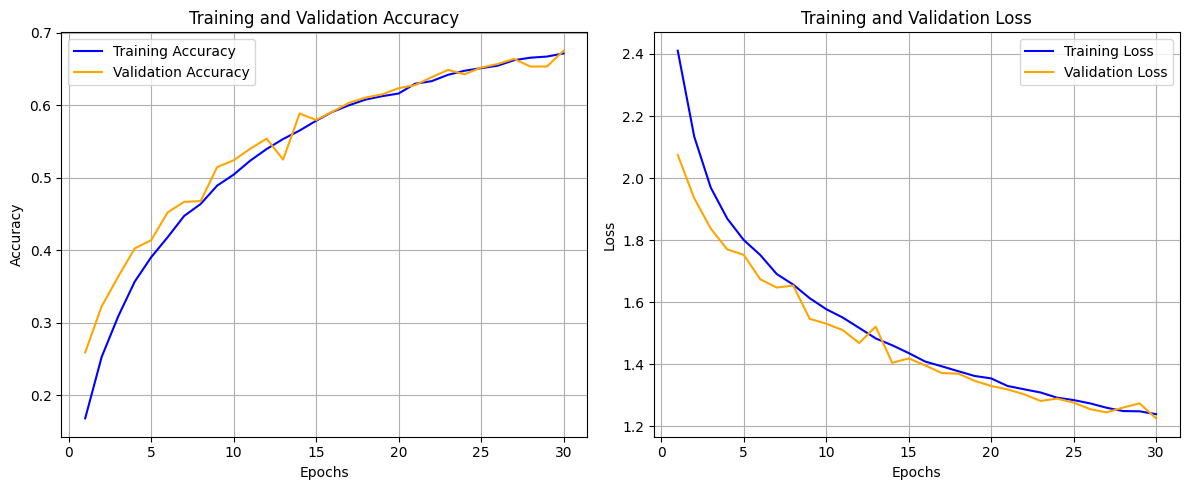

In [ ]:

model1 = resnet18(weights=None)
model1.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model1.fc.in_features, 10)
)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

# Gradual Learning Rate Warmup (10 epochs to reach target LR)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: min(1, (epoch + 1) / 10))

train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

# Training Loop
num_epochs = 30
clip_value = 1.0  # Gradient clipping threshold

for epoch in range(num_epochs):
    model1.train()
    running_loss, running_corrects = 0.0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Applying gradient clipping
        nn.utils.clip_grad_value_(model1.parameters(), clip_value)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss, val_running_corrects = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

    scheduler.step()

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


The curves now were super smooth and worked well , no overfitting, just running for more epochs to enhance the accuracy

100%|██████████| 170M/170M [00:02<00:00, 61.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/50 - accuracy: 0.1661 - loss: 2.4128 - val_accuracy: 0.2484 - val_loss: 2.0832
Epoch 2/50 - accuracy: 0.2448 - loss: 2.1541 - val_accuracy: 0.3099 - val_loss: 1.9442
Epoch 3/50 - accuracy: 0.3029 - loss: 1.9855 - val_accuracy: 0.3543 - val_loss: 1.8565
Epoch 4/50 - accuracy: 0.3503 - loss: 1.8791 - val_accuracy: 0.3900 - val_loss: 1.7850
Epoch 5/50 - accuracy: 0.3874 - loss: 1.8067 - val_accuracy: 0.4168 - val_loss: 1.7287
Epoch 6/50 - accuracy: 0.4168 - loss: 1.7525 - val_accuracy: 0.4403 - val_loss: 1.7013
Epoch 7/50 - accuracy: 0.4396 - loss: 1.7125 - val_accuracy: 0.4700 - val_loss: 1.6388
Epoch 8/50 - accuracy: 0.4634 - loss: 1.6683 - val_accuracy: 0.4733 - val_loss: 1.6242
Epoch 9/50 - accuracy: 0.4864 - loss: 1.6232 - val_accuracy: 0.5107 - val_loss: 1.5478
Epoch 10/50 - accuracy: 0.4984 - loss: 1.5979 - val_accuracy: 0.4971 - val_loss: 1.5824
Epoch 11/50 - accuracy: 0.5165 - loss: 1

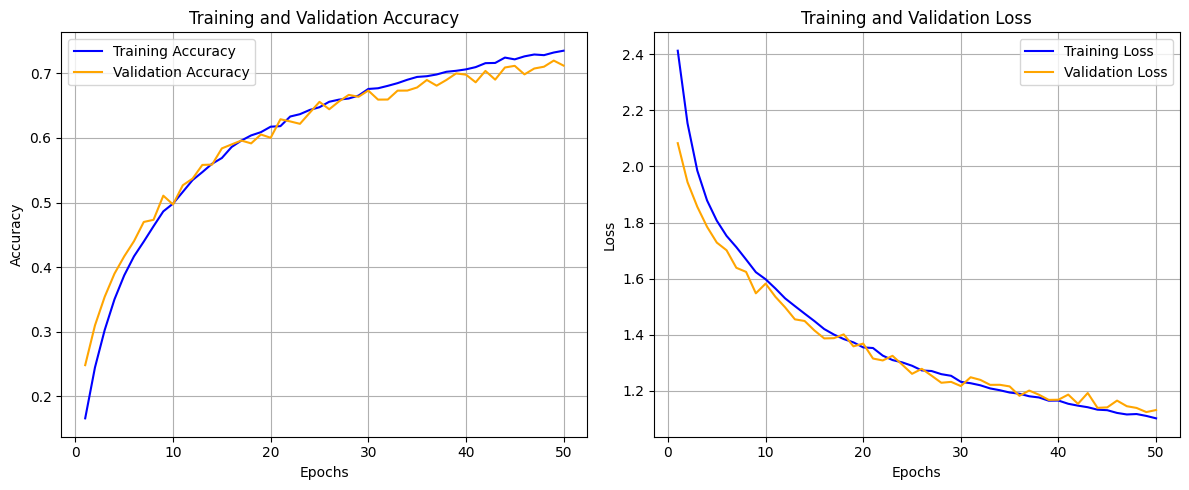

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


full_dataset = CIFAR10(root='./data', train=True, download=True)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model1 = resnet18(weights=None)
model1.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model1.fc.in_features, 10))

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)

scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: min(1, (epoch + 1) / 10))


train_losses, train_accuracies, val_losses, val_accuracies = [], [], [], []

# Training Loop
num_epochs = 50
clip_value = 1.0  # Gradient clipping threshold

for epoch in range(num_epochs):
    model1.train()
    running_loss, running_corrects = 0.0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Applying gradient clipping
        nn.utils.clip_grad_value_(model1.parameters(), clip_value)

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())

    # Validation Loop
    model1.eval()
    val_running_loss, val_running_corrects = 0.0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model1(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f'Epoch {epoch + 1}/{num_epochs} - '
          f'accuracy: {epoch_acc:.4f} - '
          f'loss: {epoch_loss:.4f} - '
          f'val_accuracy: {val_epoch_acc:.4f} - '
          f'val_loss: {val_epoch_loss:.4f}')

    scheduler.step()

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Finally The above approach gave a decent accuracy, with no overfitting.


---


Now I will using Test data to check the performance.



Test Accuracy: 77.02%
              precision    recall  f1-score   support

    airplane       0.80      0.81      0.81      1000
  automobile       0.88      0.87      0.87      1000
        bird       0.69      0.70      0.70      1000
         cat       0.64      0.56      0.60      1000
        deer       0.77      0.69      0.73      1000
         dog       0.66      0.69      0.68      1000
        frog       0.81      0.82      0.81      1000
       horse       0.76      0.85      0.80      1000
        ship       0.88      0.84      0.86      1000
       truck       0.81      0.86      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



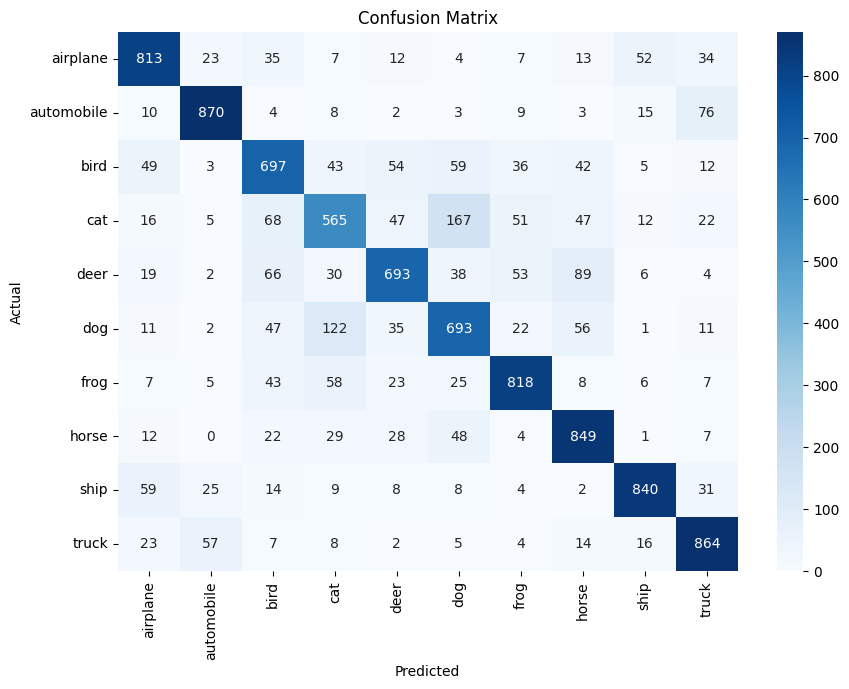

In [ ]:

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    return all_labels, all_preds


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)

# Evaluating the model
test_labels, test_preds = evaluate_model(model1, test_loader, device)

# Calculating accuracy
test_accuracy = (np.array(test_preds) == np.array(test_labels)).mean()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(test_labels, test_preds)# Confusion Matrix
class_report = classification_report(test_labels, test_preds, target_names=test_dataset.classes)# Classification Report

print(class_report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Test Accuracy was : 77.02%

# **2. MODEL-2 : AlexNet**

### **Part-1: Optimizers**

Here I already started with , little data augumentaion and experimeted with 3 optimizers Adam,SDG, RMSProp

Files already downloaded and verified
Files already downloaded and verified
Training with SGD optimizer:
Epoch 1/15 - Train Loss: 2.0210 - Train Accuracy: 0.2396 - Val Loss: 1.5523 - Val Accuracy: 0.4163
Epoch 2/15 - Train Loss: 1.4488 - Train Accuracy: 0.4684 - Val Loss: 1.1858 - Val Accuracy: 0.5732
Epoch 3/15 - Train Loss: 1.1324 - Train Accuracy: 0.5964 - Val Loss: 1.0600 - Val Accuracy: 0.6115
Epoch 4/15 - Train Loss: 0.9224 - Train Accuracy: 0.6757 - Val Loss: 0.8696 - Val Accuracy: 0.6901
Epoch 5/15 - Train Loss: 0.7811 - Train Accuracy: 0.7276 - Val Loss: 0.8270 - Val Accuracy: 0.7033
Epoch 6/15 - Train Loss: 0.6831 - Train Accuracy: 0.7621 - Val Loss: 0.6821 - Val Accuracy: 0.7613
Epoch 7/15 - Train Loss: 0.5992 - Train Accuracy: 0.7909 - Val Loss: 0.7232 - Val Accuracy: 0.7568
Epoch 8/15 - Train Loss: 0.5435 - Train Accuracy: 0.8116 - Val Loss: 0.6597 - Val Accuracy: 0.7731
Epoch 9/15 - Train Loss: 0.4834 - Train Accuracy: 0.8305 - Val Loss: 0.6155 - Val Accuracy: 0.7928
Epoc

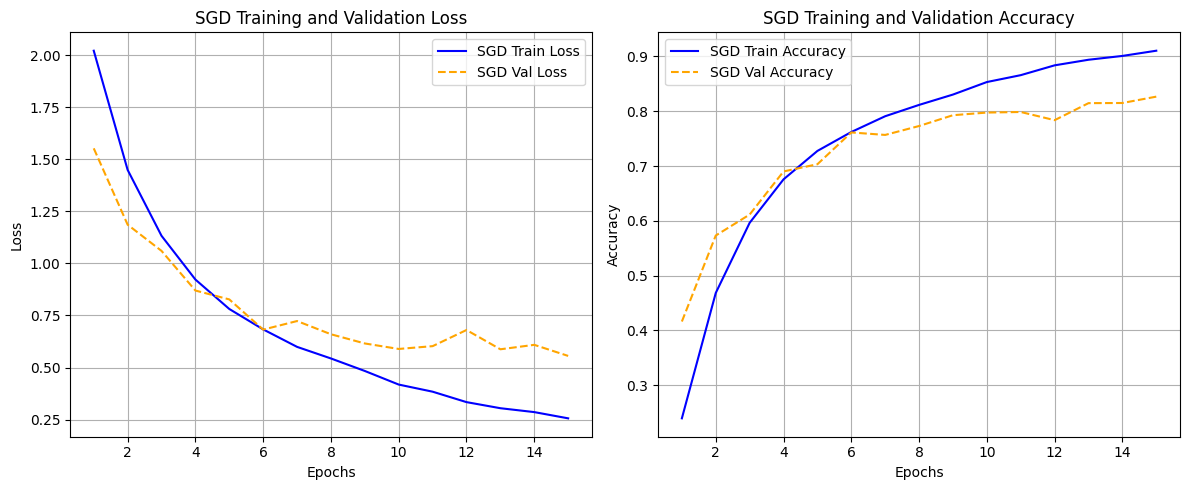

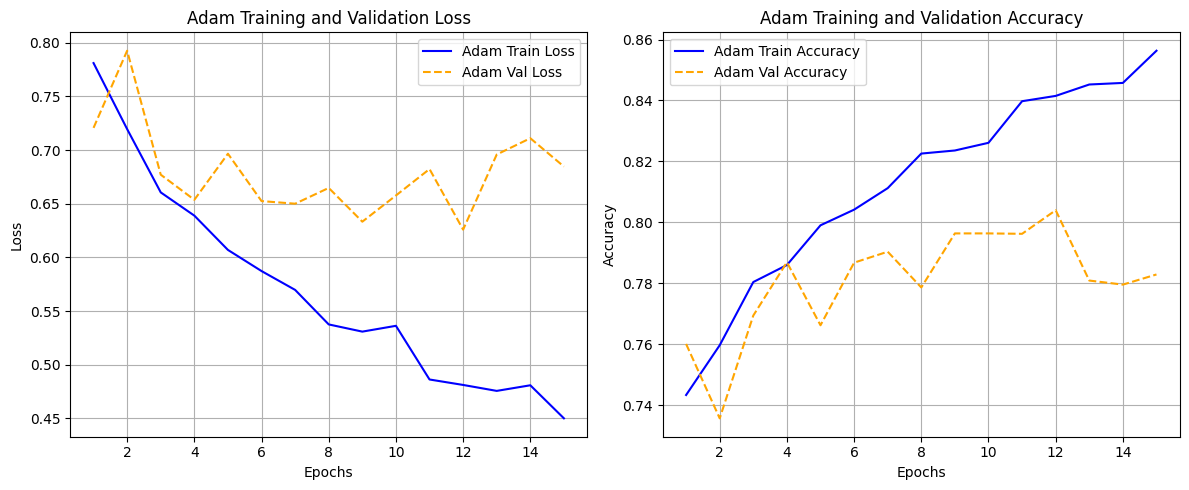

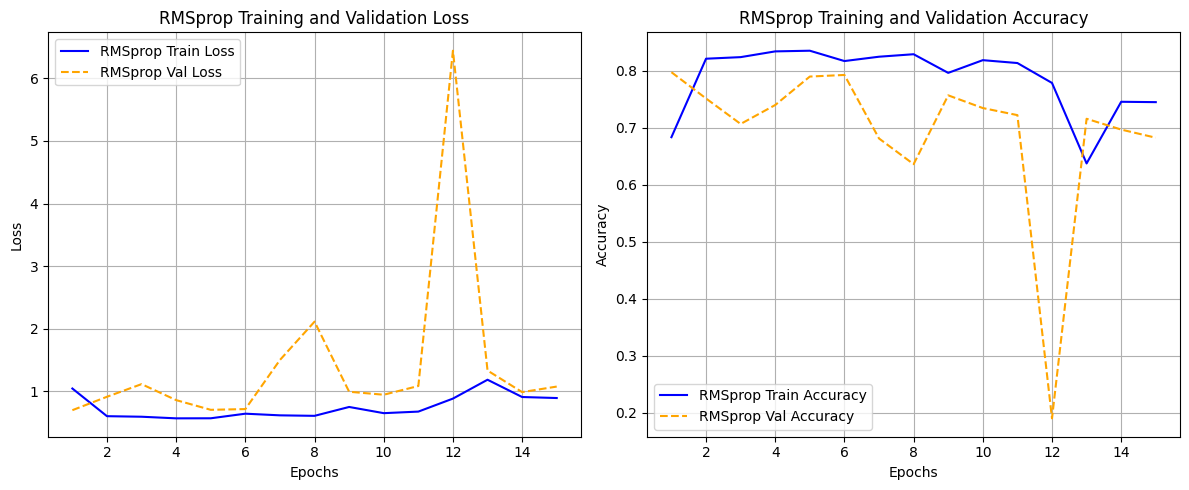

In [ ]:

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


full_dataset = CIFAR10(root='./data', train=True, download=True)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model = alexnet(weights=None)  # Use the built-in AlexNet model
model.classifier[6] = nn.Linear(4096, 10)

# Function to train the model
def train_model(optimizer, num_epochs=15):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation Loop
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}')

    return train_losses, train_accuracies, val_losses, val_accuracies

# Training with different optimizers
optimizers = {
    "SGD": optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    "Adam": optim.Adam(model.parameters(), lr=0.001),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.001)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"Training with {opt_name} optimizer:")
    train_loss, train_acc, val_loss, val_acc = train_model(optimizer)
    results[opt_name] = (train_loss, train_acc, val_loss, val_acc)

# Plotting the results
for opt_name, (train_loss, train_acc, val_loss, val_acc) in results.items():
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label=f'{opt_name} Train Loss', color='blue')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label=f'{opt_name} Val Loss', color='orange', linestyle='dashed')
    plt.title(f'{opt_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label=f'{opt_name} Train Accuracy', color='blue')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label=f'{opt_name} Val Accuracy', color='orange', linestyle='dashed')
    plt.title(f'{opt_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


### **Part-2: Training and Hyperparameter Tuning**

Continuing with SDG, was giving good accuracy , but was overfitting so using:


*   Enhance Data Augumentation
*   0.3 dropout
*   Weight decay





Files already downloaded and verified
Files already downloaded and verified
Training with SGD optimizer:
Epoch 1/20 - Train Loss: 1.9923 - Train Accuracy: 0.2481 - Val Loss: 1.8058 - Val Accuracy: 0.3507
Epoch 2/20 - Train Loss: 1.4219 - Train Accuracy: 0.4771 - Val Loss: 1.1974 - Val Accuracy: 0.5637
Epoch 3/20 - Train Loss: 1.1205 - Train Accuracy: 0.6003 - Val Loss: 1.0034 - Val Accuracy: 0.6511
Epoch 4/20 - Train Loss: 0.9240 - Train Accuracy: 0.6764 - Val Loss: 1.0133 - Val Accuracy: 0.6485
Epoch 5/20 - Train Loss: 0.8425 - Train Accuracy: 0.7059 - Val Loss: 0.7391 - Val Accuracy: 0.7484
Epoch 6/20 - Train Loss: 0.7230 - Train Accuracy: 0.7492 - Val Loss: 0.6894 - Val Accuracy: 0.7631
Epoch 7/20 - Train Loss: 0.6616 - Train Accuracy: 0.7715 - Val Loss: 0.7057 - Val Accuracy: 0.7581
Epoch 8/20 - Train Loss: 0.6169 - Train Accuracy: 0.7864 - Val Loss: 0.6826 - Val Accuracy: 0.7732
Epoch 9/20 - Train Loss: 0.5670 - Train Accuracy: 0.8049 - Val Loss: 0.6620 - Val Accuracy: 0.7723
Epoc

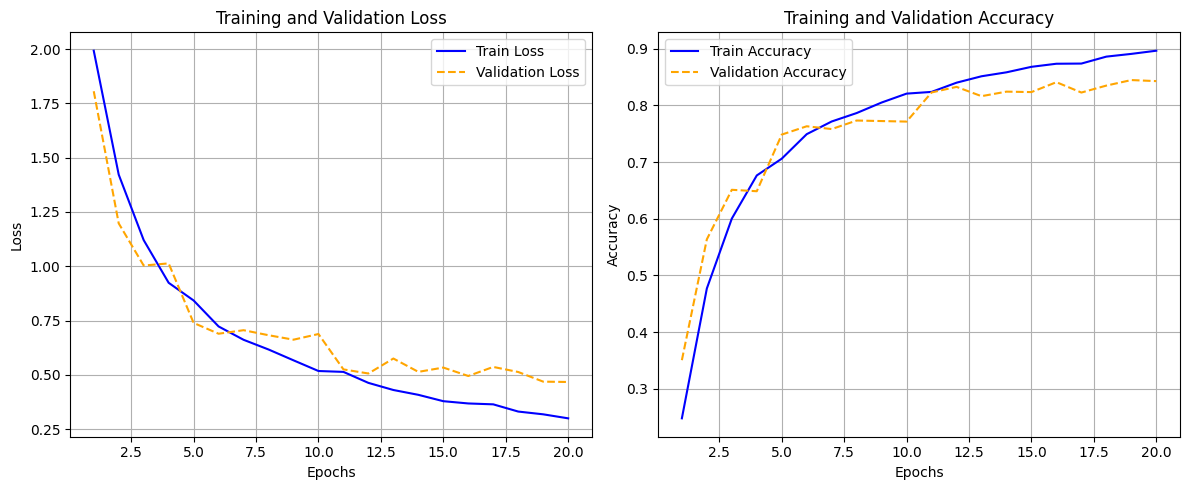

In [ ]:

# Define transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(224, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

full_dataset = CIFAR10(root='./data', train=True, download=True)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


model = alexnet(weights=None)
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(4096, 10)
)


def train_model(optimizer, num_epochs=20):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation Loop
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}')

    return train_losses, train_accuracies, val_losses, val_accuracies

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
print("Training with SGD optimizer:")
train_loss, train_acc, val_loss, val_acc = train_model(optimizer)

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange', linestyle='dashed')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange', linestyle='dashed')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


The Model was giving good accuracy, without any extreme overfitting.

---
Using Test Data for performance Evaluation: which gave accuracy of 86.40%


Files already downloaded and verified
Test Accuracy: 86.40%
              precision    recall  f1-score   support

    airplane       0.85      0.90      0.87      1000
  automobile       0.93      0.94      0.94      1000
        bird       0.83      0.80      0.81      1000
         cat       0.70      0.76      0.73      1000
        deer       0.86      0.86      0.86      1000
         dog       0.85      0.76      0.80      1000
        frog       0.88      0.93      0.90      1000
       horse       0.92      0.88      0.90      1000
        ship       0.93      0.92      0.92      1000
       truck       0.91      0.90      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



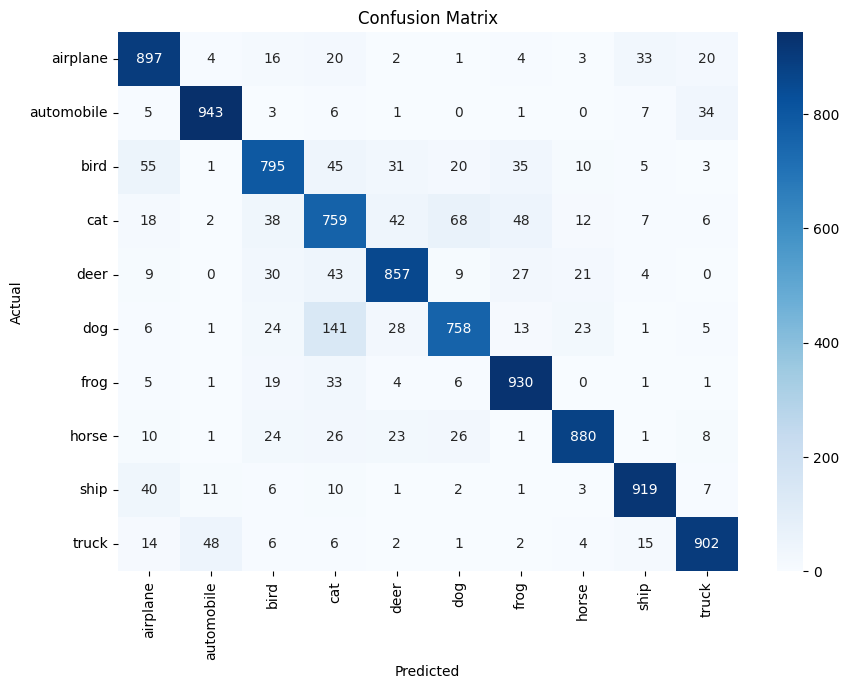

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return all_labels, all_preds


test_labels, test_preds = evaluate_model(model, test_loader)
test_accuracy = (np.array(test_preds) == np.array(test_labels)).mean()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Classification Report
class_report = classification_report(test_labels, test_preds, target_names=test_dataset.classes)
print(class_report)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Some other experiments :
*   Enhance Data Augumentation
*   0.3 dropout
*   Weight decay
*   Step LR Scheduler

Cancelled because valiadtion started fluctuating a lot



Files already downloaded and verified
Files already downloaded and verified
Training with SGD optimizer and learning rate scheduler:
Epoch 1/20 - Train Loss: 2.0328 - Train Accuracy: 0.2294 - Val Loss: 1.7859 - Val Accuracy: 0.3453
Epoch 2/20 - Train Loss: 1.4600 - Train Accuracy: 0.4637 - Val Loss: 1.3995 - Val Accuracy: 0.4845
Epoch 3/20 - Train Loss: 1.1432 - Train Accuracy: 0.5906 - Val Loss: 1.0284 - Val Accuracy: 0.6388
Epoch 4/20 - Train Loss: 0.9470 - Train Accuracy: 0.6686 - Val Loss: 0.9935 - Val Accuracy: 0.6597
Epoch 5/20 - Train Loss: 0.8311 - Train Accuracy: 0.7083 - Val Loss: 0.7659 - Val Accuracy: 0.7377
Epoch 6/20 - Train Loss: 0.7335 - Train Accuracy: 0.7476 - Val Loss: 0.7029 - Val Accuracy: 0.7567
Epoch 7/20 - Train Loss: 0.6638 - Train Accuracy: 0.7702 - Val Loss: 0.6038 - Val Accuracy: 0.7895
Epoch 8/20 - Train Loss: 0.6066 - Train Accuracy: 0.7906 - Val Loss: 0.5668 - Val Accuracy: 0.8031
Epoch 9/20 - Train Loss: 0.5620 - Train Accuracy: 0.8071 - Val Loss: 0.5616

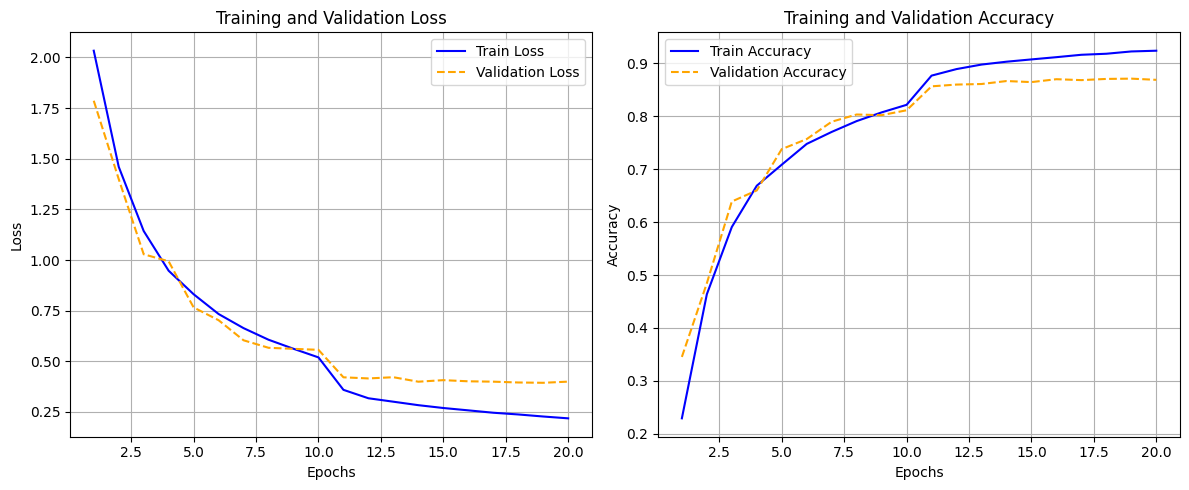

In [ ]:
model = alexnet(weights=None)
model.classifier[6] = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(4096, 10)
)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

def train_model(optimizer, scheduler, num_epochs=20):
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation Loop
        model.eval()
        val_running_loss = 0.0
        val_running_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}')

        scheduler.step()

    return train_losses, train_accuracies, val_losses, val_accuracies

# Train the model
print("Training with SGD optimizer and learning rate scheduler:")
train_loss, train_acc, val_loss, val_acc = train_model(optimizer, scheduler)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange', linestyle='dashed')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange', linestyle='dashed')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## **Model-3 : MobileNetV2**

### **Part-1: Optimizers**

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

full_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


model = models.mobilenet_v2(weights=None)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)

def train_model(optimizer, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation Loop
        model.eval()
        val_running_loss, val_running_corrects = 0.0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}')

    return train_losses, train_accuracies, val_losses, val_accuracies

# Training with different optimizers
optimizers = {
    "SGD": optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
    "Adam": optim.Adam(model.parameters(), lr=0.001),
    "RMSprop": optim.RMSprop(model.parameters(), lr=0.001)
}

results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer:")
    train_loss, train_acc, val_loss, val_acc = train_model(optimizer)
    results[opt_name] = (train_loss, train_acc, val_loss, val_acc)

# Plotting the results
for opt_name, (train_loss, train_acc, val_loss, val_acc) in results.items():
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label=f'{opt_name} Train Loss', color='blue')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label=f'{opt_name} Val Loss', color='orange', linestyle='dashed')
    plt.title(f'{opt_name} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label=f'{opt_name} Train Accuracy', color='blue')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label=f'{opt_name} Val Accuracy', color='orange', linestyle='dashed')
    plt.title(f'{opt_name} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Files already downloaded and verified
Files already downloaded and verified

Training with SGD optimizer:
Epoch 1/10 - Train Loss: 1.5689 - Train Accuracy: 0.4202 - Val Loss: 1.3801 - Val Accuracy: 0.5040
Epoch 2/10 - Train Loss: 1.0318 - Train Accuracy: 0.6365 - Val Loss: 0.8609 - Val Accuracy: 0.7041
Epoch 3/10 - Train Loss: 0.7749 - Train Accuracy: 0.7303 - Val Loss: 0.7334 - Val Accuracy: 0.7495
Epoch 4/10 - Train Loss: 0.6222 - Train Accuracy: 0.7825 - Val Loss: 0.6759 - Val Accuracy: 0.7680
Epoch 5/10 - Train Loss: 0.5119 - Train Accuracy: 0.8211 - Val Loss: 0.5889 - Val Accuracy: 0.7999
Epoch 6/10 - Train Loss: 0.4264 - Train Accuracy: 0.8516 - Val Loss: 0.5809 - Val Accuracy: 0.8033
Epoch 7/10 - Train Loss: 0.3641 - Train Accuracy: 0.8737 - Val Loss: 0.6180 - Val Accuracy: 0.8035
Epoch 8/10 - Train Loss: 0.3032 - Train Accuracy: 0.8938 - Val Loss: 0.5816 - Val Accuracy: 0.8255
Epoch 9/10 - Train Loss: 0.2879 - Train Accuracy: 0.8979 - Val Loss: 0.5888 - Val Accuracy: 0.8275
Epo

### **Part-2: Traning and Tuning**

From the previous experiment I knew that , SDG was giving good results, just overfitting a little, so


*   ehanced data augumentation
*   adding weight decay



Files already downloaded and verified
Files already downloaded and verified
Epoch 1/12 - Train Loss: 1.6455 - Train Accuracy: 0.3894 - Val Loss: 1.3650 - Val Accuracy: 0.4889
Epoch 2/12 - Train Loss: 1.1614 - Train Accuracy: 0.5865 - Val Loss: 1.0251 - Val Accuracy: 0.6403
Epoch 3/12 - Train Loss: 0.9069 - Train Accuracy: 0.6836 - Val Loss: 0.8299 - Val Accuracy: 0.7096
Epoch 4/12 - Train Loss: 0.7547 - Train Accuracy: 0.7377 - Val Loss: 0.7689 - Val Accuracy: 0.7328
Epoch 5/12 - Train Loss: 0.6474 - Train Accuracy: 0.7769 - Val Loss: 0.6214 - Val Accuracy: 0.7852
Epoch 6/12 - Train Loss: 0.5780 - Train Accuracy: 0.7987 - Val Loss: 0.5977 - Val Accuracy: 0.7960
Epoch 7/12 - Train Loss: 0.5306 - Train Accuracy: 0.8163 - Val Loss: 0.5886 - Val Accuracy: 0.7983
Epoch 8/12 - Train Loss: 0.4706 - Train Accuracy: 0.8381 - Val Loss: 0.5165 - Val Accuracy: 0.8252
Epoch 9/12 - Train Loss: 0.4304 - Train Accuracy: 0.8512 - Val Loss: 0.5366 - Val Accuracy: 0.8160
Epoch 10/12 - Train Loss: 0.4024 

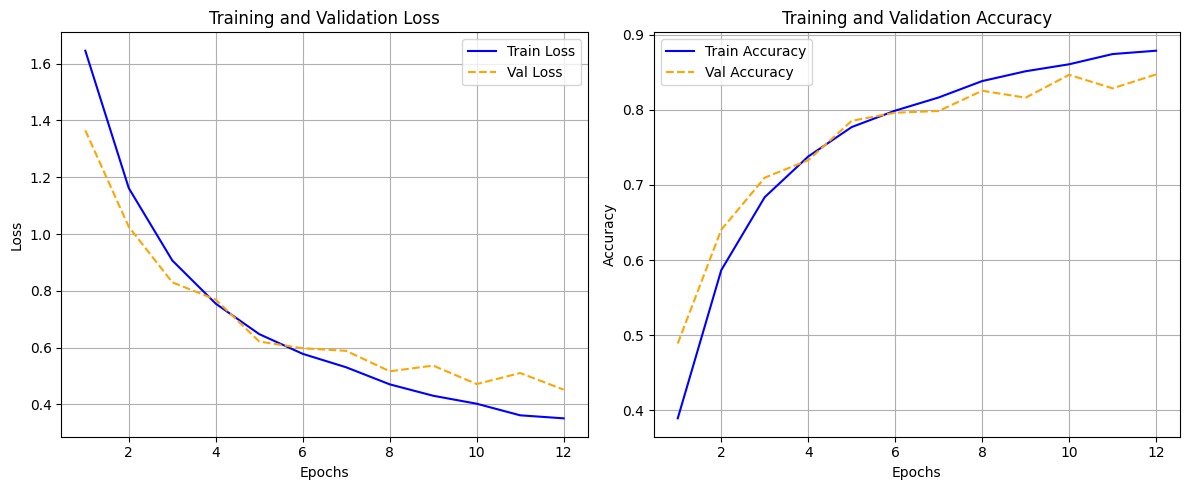

In [ ]:

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

full_dataset = CIFAR10(root='./data', train=True, download=True)
train_size = int(0.85 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_val)

train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = models.mobilenet_v2(weights=None)
model.classifier[1] = nn.Sequential(
    nn.Linear(model.classifier[1].in_features, 10))

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

# Training function
def train_model(num_epochs=12):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation loop
        model.eval()
        val_running_loss, val_running_corrects = 0.0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data)

        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_epoch_acc = val_running_corrects.double() / len(val_loader.dataset)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - '
              f'Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}')

    return train_losses, train_accuracies, val_losses, val_accuracies

train_losses, train_accuracies, val_losses, val_accuracies = train_model()

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()


The above model reduces the overfitting and provides decent accuracy

---
Now using Test Data to evaluate performance : which gave accuracy of 84.90%



Files already downloaded and verified
Test Accuracy: 84.90%
              precision    recall  f1-score   support

    airplane       0.90      0.83      0.86      1000
  automobile       0.90      0.97      0.93      1000
        bird       0.80      0.79      0.80      1000
         cat       0.72      0.71      0.72      1000
        deer       0.80      0.83      0.82      1000
         dog       0.73      0.80      0.77      1000
        frog       0.90      0.87      0.88      1000
       horse       0.92      0.85      0.88      1000
        ship       0.91      0.94      0.92      1000
       truck       0.92      0.90      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



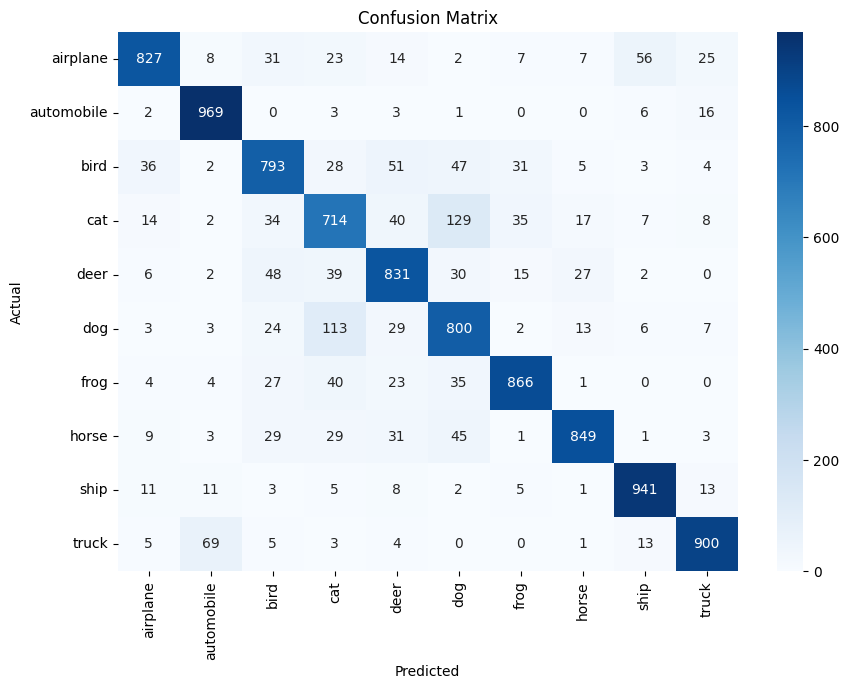

In [ ]:
# Assuming you have already defined the transformations
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Define the test dataset and DataLoader
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
## Function to evaluate the model on the test set
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)  # Forward pass
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.numpy())  # Store predictions
            all_labels.extend(labels.numpy())  # Store true labels

    return all_labels, all_preds

# Evaluate the model
test_labels, test_preds = evaluate_model(model, test_loader)

# Calculate accuracy
test_accuracy = (np.array(test_preds) == np.array(test_labels)).mean()
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds)

# Classification Report
class_report = classification_report(test_labels, test_preds, target_names=test_dataset.classes)
print(class_report)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
